In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [82]:
# Obtaining the dataset
epl_df = pd.read_csv("datasets/english premier league data.csv")
epl_df.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [83]:
epl_df.columns

Index(['Unnamed: 0', 'Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored

In [84]:
epl_df = epl_df.drop(columns=['Unnamed: 0'])
epl_df.columns

Index(['Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
       'Hom

In [85]:
epl_df.isna().sum()

Home Team                        0
Away Team                        0
Score                            0
Half Time Score                  0
Match Excitement                 0
Home Team Rating                 0
Away Team Rating                 0
Home Team Possession %           0
Away Team Possession %           0
Home Team Off Target Shots       0
Home Team On Target Shots        0
Home Team Total Shots            0
Home Team Blocked Shots          0
Home Team Corners                0
Home Team Throw Ins              0
Home Team Pass Success %         0
Home Team Aerials Won            0
Home Team Clearances             0
Home Team Fouls                  0
Home Team Yellow Cards           0
Home Team Second Yellow Cards    0
Home Team Red Cards              0
Away Team Off Target Shots       0
Away Team On Target Shots        0
Away Team Total Shots            0
Away Team Blocked Shots          0
Away Team Corners                0
Away Team Throw Ins              0
Away Team Pass Succe

In [86]:
epl_df.shape
epl_df.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,5.0,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,5.0,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,5.0,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,10.0,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,7.0,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [87]:
epl_df.dtypess

Home Team                         object
Away Team                         object
Score                             object
Half Time Score                   object
Match Excitement                 float64
Home Team Rating                 float64
Away Team Rating                 float64
Home Team Possession %             int64
Away Team Possession %             int64
Home Team Off Target Shots       float64
Home Team On Target Shots        float64
Home Team Total Shots            float64
Home Team Blocked Shots          float64
Home Team Corners                float64
Home Team Throw Ins              float64
Home Team Pass Success %         float64
Home Team Aerials Won            float64
Home Team Clearances             float64
Home Team Fouls                  float64
Home Team Yellow Cards           float64
Home Team Second Yellow Cards    float64
Home Team Red Cards              float64
Away Team Off Target Shots       float64
Away Team On Target Shots        float64
Away Team Total 

In [88]:
# epl_df = epl_df.drop(columns=['Total'])
epl_df.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,5.0,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,5.0,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,5.0,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,10.0,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,7.0,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [89]:
#epl_df = epl_df.assign(Total =lambda epl_df: epl_df["Home Team Goals Scored"]+epl_df["Away Team Goals Scored"])
epldf = epl_df['Total Goals Scored'] = epl_df["Home Team Goals Scored"] + epl_df["Away Team Goals Scored"]
epl_df.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,Total Goals Scored
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,5.0,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,3
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,5.0,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,4
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,5.0,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,4
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,10.0,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,1
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,7.0,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,1


r = 0.88


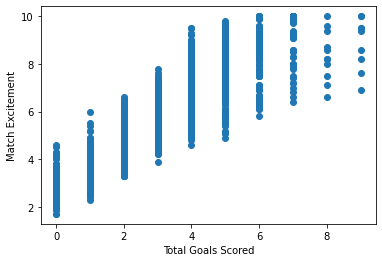

In [106]:
goals_scored = epl_df['Total Goals Scored']
match_excite = epl_df['Match Excitement']
plt.scatter(goals_scored, match_excite)
plt.xlabel("Total Goals Scored")
plt.ylabel("Match Excitement")

correlation = st.pearsonr(goals_scored, match_excite)
print(f"r = {round(correlation[0], 2)}")

In [91]:
epl_df

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,Total Goals Scored
0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,5.0,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,3
1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,5.0,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,4
2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,5.0,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,4
3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,10.0,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,1
4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,7.0,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,ARSENAL,BRIGHTON,2-0,0-0,4.5,7.3,5.5,54,46,7.0,...,8.0,0.0,0.0,0.0,2,0,0,2,2020,2
2656,SHEFFIELD UTD,BURNLEY,1-0,1-0,3.6,6.2,5.8,43,57,7.0,...,1.0,1.0,0.0,0.0,1,0,0,1,2020,1
2657,LEICESTER CITY,TOTTENHAM,2-4,1-1,8.7,6.0,6.7,47,53,2.0,...,8.0,2.0,0.0,0.0,2,4,4,2,2020,6
2658,WEST HAM,SOUTHAMPTON,3-0,2-0,5.8,7.3,5.2,37,63,6.0,...,9.0,3.0,0.0,0.0,3,0,0,3,2020,3


r = 0.16


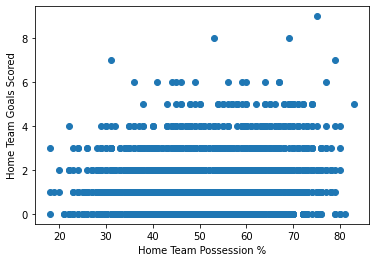

In [107]:
home_possession = epl_df['Home Team Possession %']
home_goals = epl_df['Home Team Goals Scored']
plt.scatter(home_possession, home_goals)
plt.xlabel("Home Team Possession %")
plt.ylabel("Home Team Goals Scored")

correlation = st.pearsonr(home_possession, home_goals)
print(f"r = {round(correlation[0], 2)}")

r = 0.08


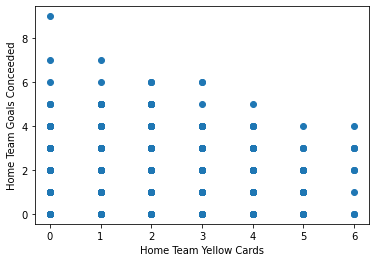

In [114]:
home_yellows = epl_df['Home Team Yellow Cards']
home_goals_con = epl_df['Home Team Goals Conceeded']
plt.scatter(home_yellows, home_goals_con)
plt.xlabel("Home Team Yellow Cards")
plt.ylabel("Home Team Goals Conceeded")

correlation = st.pearsonr(home_yellows, home_goals_con)
print(f"r = {round(correlation[0], 2)}")

<BarContainer object of 2660 artists>

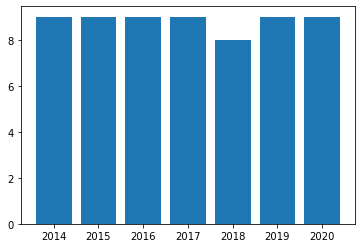

In [111]:
year = epl_df['year']
tot_goals = epl_df['Total Goals Scored']
plt.bar(year, tot_goals)


r = 0.29


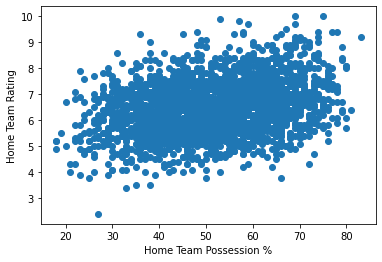

In [112]:
home_possession = epl_df['Home Team Possession %']
home_rating = epl_df['Home Team Rating']
plt.scatter(home_possession, home_rating)
plt.xlabel("Home Team Possession %")
plt.ylabel("Home Team Rating")

# correlation coefficient to look at the relationship 
# between home team possession and home team rating
correlation = st.pearsonr(home_possession, home_rating)
print(f"r = {round(correlation[0], 2)}")

r = 0.27


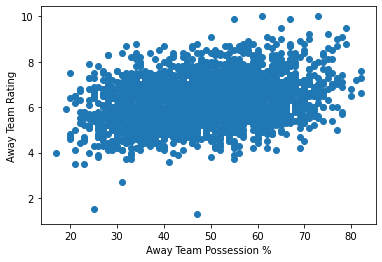

In [113]:
away_possession = epl_df['Away Team Possession %']
away_rating = epl_df['Away Team Rating']
plt.scatter(away_possession, away_rating)
plt.xlabel("Away Team Possession %")
plt.ylabel("Away Team Goals Scored")

# correlation coefficient to look at the relationship 
# between home team possession and home team rating
correlation = st.pearsonr(away_possession, away_rating)
print(f"r = {round(correlation[0], 2)}")

r = 0.16


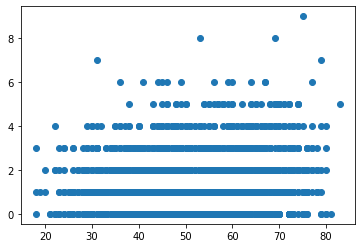

In [96]:
home_possession = epl_df['Home Team Possession %']
home_goals = epl_df['Home Team Goals Scored']
plt.scatter(home_possession, home_goals)

# correlation coefficient to look at the relationship 
# between home team possession and home team rating
correlation = st.pearsonr(home_possession, home_goals)
print(f"r = {round(correlation[0], 2)}")

In [97]:
epl_df.columns

Index(['Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
       'Hom

r = 0.16


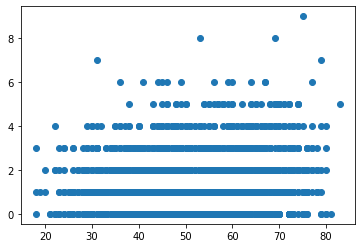

In [98]:
home_possession = epl_df['Home Team Possession %']
home_goals = epl_df['Home Team Goals Scored']
plt.scatter(home_possession, home_goals)

# correlation coefficient to look at the relationship 
# between home team possession and home team rating
correlation = st.pearsonr(home_possession, home_goals)
print(f"r = {round(correlation[0], 2)}")

r = -0.12


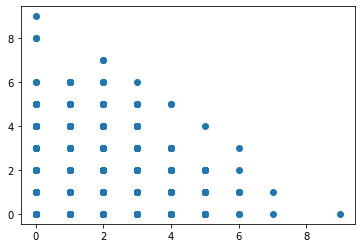

In [99]:
away_goals = epl_df['Away Team Goals Scored']
away_goals_con = epl_df['Away Team Goals Conceeded']
plt.scatter(away_goals, away_goals_con)


# correlation coefficient to look at the relationship 
# between home team possession and home team rating
correlation = st.pearsonr(away_goals, away_goals_con)
print(f"r = {round(correlation[0], 2)}")

In [101]:
epl_df.columns

Index(['Home Team', 'Away Team', 'Score', 'Half Time Score',
       'Match Excitement', 'Home Team Rating', 'Away Team Rating',
       'Home Team Possession %', 'Away Team Possession %',
       'Home Team Off Target Shots', 'Home Team On Target Shots',
       'Home Team Total Shots', 'Home Team Blocked Shots', 'Home Team Corners',
       'Home Team Throw Ins', 'Home Team Pass Success %',
       'Home Team Aerials Won', 'Home Team Clearances', 'Home Team Fouls',
       'Home Team Yellow Cards', 'Home Team Second Yellow Cards',
       'Home Team Red Cards', 'Away Team Off Target Shots',
       'Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
       'Hom

array([[<AxesSubplot:xlabel='Match Excitement', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Rating', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Away Team Rating', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Possession %', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Away Team Possession %', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Off Target Shots', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team On Target Shots', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Total Shots', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Blocked Shots', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Corners', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Throw Ins', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home Team Pass Success %', ylabel='Match Excitement'>,
        <AxesSubplot:xlabel='Home

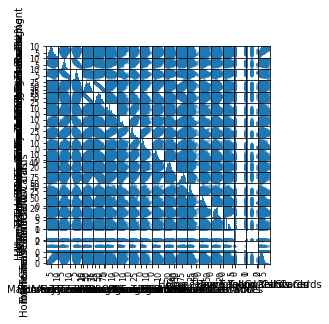

In [104]:
epl_dff = epl_df.drop(columns=['Home Team', 'Away Team', 'Score', 'Half Time Score', 'Away Team Off Target Shots','Away Team On Target Shots', 'Away Team Total Shots',
       'Away Team Blocked Shots', 'Away Team Corners', 'Away Team Throw Ins',
       'Away Team Pass Success %', 'Away Team Aerials Won',
       'Away Team Clearances', 'Away Team Fouls', 'Away Team Yellow Cards',
       'Away Team Second Yellow Cards', 'Away Team Red Cards',
       'Home Team Goals Scored', 'Away Team Goals Scored',
       'Home Team Goals Conceeded', 'Away Team Goals Conceeded', 'year',])
pd.plotting.scatter_matrix(epl_dff, figsize=(4,4))
plt.show()